# MACHINE LEARNING REGRESSION MODEL FOR ARAB SAUDI USED CAR PRICE

### 1. Context

The used car market in Saudi Arabia is thriving, driven by a high demand for affordable vehicles. However, accurately determining the fair market value of a used car can be challenging due to various factors like model, year, mileage, condition, and market fluctuations. This creates difficulties for both buyers and sellers.

### 2. Problem Statement

Traditionally, car dealerships and individual sellers rely on experience and market research to estimate used car prices. This method is subjective and time-consuming. Machine learning can provide a more data-driven and objective approach for predicting used car prices in Saudi Arabia.

### 3. Goal

The goal is to build a machine learning model that can predict the selling price of a used car in Saudi Arabia based on relevant features.

### 4. Analytic Approach

Here's a breakdown of the steps involved:

Data Acquisition:
Collect data on used car sales in Saudi Arabia. This data can be obtained from online platforms like Haraj, websites of used car dealerships, or government records.
Ensure the data covers a wide range of car models, years, mileages, locations, and other relevant features.

Data Preprocessing:
Clean the data by handling missing values, outliers, and inconsistencies.
Encode categorical features (e.g., car brand, color) into numerical values.
Feature engineering: Create new features based on existing ones (e.g., age of the car = year - model year).

Model Selection and Training:
Choose a suitable machine learning model for regression tasks. Popular options include:
Linear Regression: A good starting point for understanding the relationship between features and price.
Random Forest: A powerful ensemble method that handles non-linear relationships effectively.
Gradient Boosting Machines (XGBoost): Another powerful option known for accuracy and handling complex data.
Train the model on the prepared data.
Fine-tune hyperparameters (model settings) to optimize performance.

Model Evaluation:
Evaluate the model's performance using metrics like Mean Squared Error (MSE) or R-squared. These metrics measure how well the predicted prices match the actual selling prices.

Deployment:
Integrate the model into a web application or mobile app.
Users can enter car details, and the model predicts the estimated selling price.

### Considerations

Data Quality: The accuracy of the model heavily relies on the quality and comprehensiveness of the training data.

Model Explainability: Depending on the chosen model, explaining the predictions might be complex. Consider techniques like feature importance analysis to understand which features have the most significant impact on the price prediction.

Market Dynamics: The model should be updated periodically to account for changes in market trends and economic factors impacting car prices.

By implementing this approach, companies and individuals in Saudi Arabia can leverage machine learning to make more informed decisions about used car pricing.


In [80]:
import pandas as pd
import numpy as np

import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msn


from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor , RandomForestClassifier
from sklearn.model_selection import train_test_split , cross_val_score , StratifiedKFold, GridSearchCV, RandomizedSearchCV,KFold
from sklearn.pipeline import Pipeline
from sklearn.metrics._scorer import _SCORERS
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import plot_tree, DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler,RobustScaler,OneHotEncoder,KBinsDiscretizer,PolynomialFeatures,LabelEncoder,OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from xgboost.sklearn import XGBRegressor

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer,SimpleImputer,KNNImputer
import warnings
warnings.filterwarnings("ignore")


In [81]:
!pip install --upgrade category_encoders

In [82]:
import category_encoders as ce

In [83]:
df_cars = pd.read_csv('/content/data_saudi_used_cars.csv')
df_cars

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,True,0
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,True,0
...,...,...,...,...,...,...,...,...,...,...,...
5619,X-Trail,Jeddah,Nissan,Automatic,Saudi,Standard,2018,2.5,78794,False,68000
5620,Altima,Jeddah,Nissan,Automatic,Saudi,Semi Full,2020,2.5,58000,True,0
5621,Yukon,Dammam,GMC,Automatic,Saudi,Full,2016,5.3,48000,False,145000
5622,RX,Dammam,Lexus,Automatic,Gulf Arabic,Full,2016,2.5,81000,False,154000


In [84]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5624 entries, 0 to 5623
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         5624 non-null   object 
 1   Region       5624 non-null   object 
 2   Make         5624 non-null   object 
 3   Gear_Type    5624 non-null   object 
 4   Origin       5624 non-null   object 
 5   Options      5624 non-null   object 
 6   Year         5624 non-null   int64  
 7   Engine_Size  5624 non-null   float64
 8   Mileage      5624 non-null   int64  
 9   Negotiable   5624 non-null   bool   
 10  Price        5624 non-null   int64  
dtypes: bool(1), float64(1), int64(3), object(6)
memory usage: 445.0+ KB


In [85]:
df_cars.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,5624.0,2014.101885,5.791606,1963.0,2012.0,2016.0,2018.0,2022.0
Engine_Size,5624.0,3.295430,1.515108,1.0,2.0,3.0,4.5,9.0
Mileage,5624.0,150923.375000,382835.963005,100.0,38000.0,103000.0,196000.0,20000000.0
Price,5624.0,53074.058144,70155.340614,0.0,0.0,36500.0,72932.5,850000.0


In [86]:
df_cars.describe(include='object').T

,count,unique,top,freq
Type,5624,347,Land Cruiser,269
Region,5624,27,Riyadh,2272
Make,5624,58,Toyota,1431
Gear_Type,5624,2,Automatic,4875
Origin,5624,4,Saudi,4188
Options,5624,3,Full,2233


In [87]:
pd.set_option('display.max_colwidth', 1)
listItem = []
for col in df_cars.columns :
    listItem.append( [col, df_cars[col].nunique(), df_cars[col].unique()])

tabelDesc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabelDesc

,Column Name,Number of Unique,Unique Sample
0,Type,347,"[Corolla, Yukon, Range Rover, Optima, FJ, CX3, Cayenne S, Sonata, Avalon, LS, C300, Land Cruiser, Hilux, Tucson, Caprice, Sunny, Pajero, Azera, Focus, 5, Spark, Camry, Pathfinder, Accent, ML, Tahoe, Yaris, Suburban, A, Altima, Traverse, Expedition, Senta fe, Liberty, 3, X, Elantra, Land Cruiser Pickup, VTC, Malibu, The 5, A8, Patrol, Grand Cherokee, SL, Previa, SEL, Aveo, MKZ, Victoria, Datsun, Flex, GLC, ES, Edge, 6, Escalade, Innova, Navara, H1, G80, Carnival, Symbol, Camaro, Accord, Avanza, Land Cruiser 70, Taurus, C5700, Impala, Optra, S, Other, Cerato, Furniture, Murano, Explorer, LX, Pick up, Charger, H6, BT-50, Hiace, Ranger, Fusion, Rav4, Ciocca, CX9, Kona, Sentra, Sierra, Durango, CT-S, Sylvian Bus, Navigator, Opirus, Marquis, The 7, FX, Creta, ...]"
1,Region,27,"[Abha, Riyadh, Hafar Al-Batin, Aseer, Makkah, Dammam, Yanbu, Al-Baha, Jeddah, Hail, Khobar, Al-Ahsa, Jazan, Al-Medina, Al-Namas, Tabouk, Taef, Qassim, Arar, Jubail, Sabya, Al-Jouf, Najran, Wadi Dawasir, Qurayyat, Sakaka, Besha]"
2,Make,58,"[Toyota, GMC, Land Rover, Kia, Mazda, Porsche, Hyundai, Lexus, Chrysler, Chevrolet, Nissan, Mitsubishi, Ford, MG, Mercedes, Jeep, BMW, Audi, Lincoln, Cadillac, Genesis, Renault, Honda, Suzuki, Zhengzhou, Dodge, HAVAL, INFINITI, Isuzu, Changan, Aston Martin, Mercury, Great Wall, Other, Rolls-Royce, MINI, Volkswagen, BYD, Geely, Victory Auto, Classic, Jaguar, Daihatsu, Maserati, Hummer, GAC, Lifan, Bentley, Chery, Peugeot, Foton, Škoda, Fiat, Iveco, SsangYong, FAW, Tata, Ferrari]"
3,Gear_Type,2,"[Manual, Automatic]"
4,Origin,4,"[Saudi, Gulf Arabic, Other, Unknown]"
5,Options,3,"[Standard, Full, Semi Full]"
6,Year,50,"[2013, 2014, 2015, 2020, 2019, 2012, 2016, 1998, 2011, 2008, 1982, 1985, 2018, 1983, 2021, 2017, 2002, 2010, 2009, 2004, 2001, 1986, 2007, 1999, 2005, 1977, 1991, 2003, 1995, 2006, 1997, 1993, 1996, 2000, 1990, 1965, 1980, 1987, 1994, 1988, 1989, 1978, 2022, 1975, 1964, 1984, 1979, 1992, 1963, 1981]"
7,Engine_Size,71,"[1.4, 8.0, 5.0, 2.4, 4.0, 2.0, 4.8, 3.5, 4.6, 5.7, 2.7, 1.0, 3.0, 1.6, 1.5, 3.3, 6.2, 2.5, 5.3, 3.6, 5.4, 1.7, 3.7, 9.0, 4.7, 4.5, 3.8, 5.5, 2.6, 1.8, 1.2, 6.0, 6.9, 3.2, 5.9, 2.2, 5.6, 1.1, 2.9, 4.1, 1.3, 4.4, 2.8, 3.4, 8.8, 6.1, 7.0, 1.9, 7.5, 4.3, 6.5, 3.1, 6.3, 6.4, 5.8, 8.5, 2.3, 6.6, 7.2, 4.2, 5.1, 7.4, 5.2, 2.1, 6.7, 7.8, 3.9, 8.7, 4.9, 6.8, 8.9]"
8,Mileage,1716,"[421000, 80000, 140000, 220000, 49000, 25000, 189000, 155, 110864, 300, 200, 79000, 299000, 17000, 209, 340000, 30000, 71000, 85000, 500000, 290, 74715, 250, 284000, 98000, 3400, 108, 350000, 550000, 204000, 139240, 296, 105920, 187000, 10000, 18500, 292000, 280000, 270000, 345500, 110000, 247000, 55800, 92000, 27000, 600000, 307801, 62000, 38000, 89000, 137000, 422000, 208000, 11000, 245000, 500, 150000, 81000, 156000, 42000, 228000, 24000, 266000, 98100, 182000, 210800, 88000, 214000, 82808, 4000, 417970, 70000, 115, 270373, 91440, 45000, 96000, 50100, 35449, 180, 66200, 100, 349000, 168000, 105000, 130000, 212000, 139740, 256, 280, 73000, 240000, 866, 216, 183000, 148000, 4358765, 188257, 117000, 160000, ...]"
9,Negotiable,2,"[True, False]"


# Data Cleaning

## Handling Numerical Features

Based on observation of Arab Saudi Used Car Data's descriptive statistic, we found that the minimum value of Price Feature is 0. Price is our target so we need to clean this columns so it will not affect our model performance

In [88]:
df_cars[df_cars.Price ==0]

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,True,0
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,True,0
9,LS,Aseer,Lexus,Automatic,Saudi,Full,1998,4.6,300,True,0
14,Hilux,Yanbu,Toyota,Automatic,Saudi,Full,2014,2.7,209,True,0
15,Land Cruiser,Aseer,Toyota,Manual,Gulf Arabic,Semi Full,1982,4.6,340000,True,0
...,...,...,...,...,...,...,...,...,...,...,...
5610,Town Car,Jeddah,Lincoln,Automatic,Other,Full,1999,5.0,343,True,0
5614,Victoria,Makkah,Ford,Automatic,Saudi,Standard,2010,4.6,345000,True,0
5617,Yukon,Jubail,GMC,Automatic,Saudi,Semi Full,2006,5.3,300,True,0
5620,Altima,Jeddah,Nissan,Automatic,Saudi,Semi Full,2020,2.5,58000,True,0


In [89]:
df_cars['Negotiable'].value_counts()

Negotiable
False    3828
True     1796
Name: count, dtype: int64

After we check the actual data, we found that there is a lot of data in this dataset with price = 0, we must drop this data because the price of the car is our machine learning target.

We also found that most car with 0 price are labelled as Negotiable (value = True)

We decide to drop all the data with 0 Price regardless of its negotiable value

In [90]:
zeroprice =df_cars[df_cars['Price']==0].reset_index()
zeroprice

,index,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,True,0
1,4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,True,0
2,9,LS,Aseer,Lexus,Automatic,Saudi,Full,1998,4.6,300,True,0
3,14,Hilux,Yanbu,Toyota,Automatic,Saudi,Full,2014,2.7,209,True,0
4,15,Land Cruiser,Aseer,Toyota,Manual,Gulf Arabic,Semi Full,1982,4.6,340000,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1792,5610,Town Car,Jeddah,Lincoln,Automatic,Other,Full,1999,5.0,343,True,0
1793,5614,Victoria,Makkah,Ford,Automatic,Saudi,Standard,2010,4.6,345000,True,0
1794,5617,Yukon,Jubail,GMC,Automatic,Saudi,Semi Full,2006,5.3,300,True,0
1795,5620,Altima,Jeddah,Nissan,Automatic,Saudi,Semi Full,2020,2.5,58000,True,0


Here we store the data of car with 0 price, we can use this dataset to predict the estimated price of cars with 0 price.

Then we can remove the data of cars with 0 price from our cars dataframe

In [91]:
df_cars = df_cars[df_cars['Price'] !=0]
df_cars

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
5,CX3,Abha,Mazda,Automatic,Saudi,Semi Full,2019,2.0,25000,False,58000
6,Cayenne S,Riyadh,Porsche,Automatic,Saudi,Full,2012,4.8,189000,False,85000
...,...,...,...,...,...,...,...,...,...,...,...
5616,CX9,Qassim,Mazda,Automatic,Saudi,Full,2020,2.0,9500,False,132000
5618,Suburban,Riyadh,GMC,Automatic,Saudi,Full,2006,5.3,86000,False,50000
5619,X-Trail,Jeddah,Nissan,Automatic,Saudi,Standard,2018,2.5,78794,False,68000
5621,Yukon,Dammam,GMC,Automatic,Saudi,Full,2016,5.3,48000,False,145000


Based on syarah.com website, we also found that in filter section we already have a treshold for several features. We decide to apply that treshold to our data in order to gain better performance in range of defined treshold.

In [92]:
# Defining the filter criteria
year_min = 2008
year_max = 2024
price_min = 24000
price_max = 1200000
mileage_min = 100
mileage_max = 277000
engine_min = 1
engine_max = 6.6

# Apply the filters
filtered_df = df_cars[(df_cars['Year'] >= year_min) & (df_cars['Year'] <= year_max) &
                 (df_cars['Price'] >= price_min) & (df_cars['Price'] <= price_max) &
                 (df_cars['Mileage'] >= mileage_min) & (df_cars['Mileage'] <= mileage_max)&
                 (df_cars['Engine_Size'] >= engine_min) & (df_cars['Engine_Size'] <= engine_max)]

filtered_df

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
5,CX3,Abha,Mazda,Automatic,Saudi,Semi Full,2019,2.0,25000,False,58000
6,Cayenne S,Riyadh,Porsche,Automatic,Saudi,Full,2012,4.8,189000,False,85000
7,Sonata,Riyadh,Hyundai,Automatic,Saudi,Full,2016,2.4,155,False,48000
...,...,...,...,...,...,...,...,...,...,...,...
5615,6,Jeddah,Mazda,Automatic,Saudi,Semi Full,2017,2.5,106000,False,56000
5616,CX9,Qassim,Mazda,Automatic,Saudi,Full,2020,2.0,9500,False,132000
5619,X-Trail,Jeddah,Nissan,Automatic,Saudi,Standard,2018,2.5,78794,False,68000
5621,Yukon,Dammam,GMC,Automatic,Saudi,Full,2016,5.3,48000,False,145000


In [93]:
filtered_df.describe()

,Year,Engine_Size,Mileage,Price
count,3012.000000,3012.000000,3012.000000,3012.000000
mean,2016.429283,3.087749,99735.370186,89971.870186
std,2.585370,1.354270,70507.083648,74752.110314
min,2008.000000,1.000000,100.000000,24000.000000
25%,2015.000000,2.000000,44000.000000,45000.000000
50%,2017.000000,2.700000,91570.000000,67000.000000
75%,2018.000000,3.800000,144000.000000,109000.000000
max,2021.000000,6.600000,277000.000000,850000.000000


## Handling Missing and Duplicated Value

<Axes: >

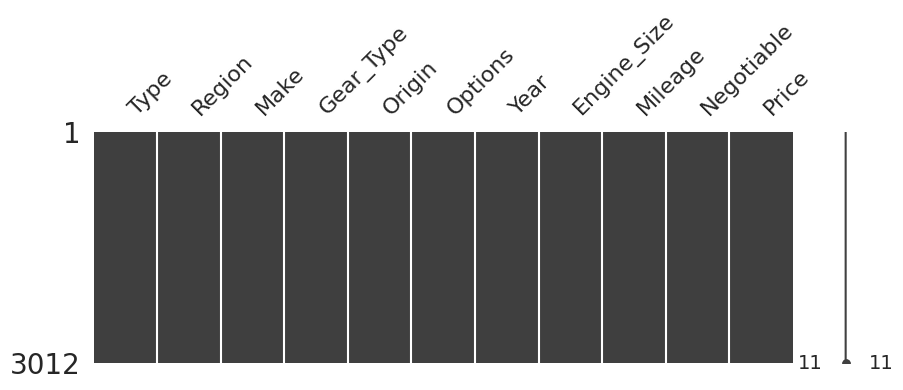

In [94]:
# missing values
msn.matrix(filtered_df, figsize=(10,3))

In [95]:
# check duplicate
print(f'duplicate data: {filtered_df.duplicated().sum()}')
print(f'duplicate data percentage : {filtered_df.duplicated().sum()/len(filtered_df)*100:.2f}%')

duplicate data: 3
duplicate data percentage : 0.10%


In [96]:
filtered_df = filtered_df.drop_duplicates(keep='last')
filtered_df

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
5,CX3,Abha,Mazda,Automatic,Saudi,Semi Full,2019,2.0,25000,False,58000
6,Cayenne S,Riyadh,Porsche,Automatic,Saudi,Full,2012,4.8,189000,False,85000
7,Sonata,Riyadh,Hyundai,Automatic,Saudi,Full,2016,2.4,155,False,48000
...,...,...,...,...,...,...,...,...,...,...,...
5615,6,Jeddah,Mazda,Automatic,Saudi,Semi Full,2017,2.5,106000,False,56000
5616,CX9,Qassim,Mazda,Automatic,Saudi,Full,2020,2.0,9500,False,132000
5619,X-Trail,Jeddah,Nissan,Automatic,Saudi,Standard,2018,2.5,78794,False,68000
5621,Yukon,Dammam,GMC,Automatic,Saudi,Full,2016,5.3,48000,False,145000


In [97]:
num_features = ['Price','Mileage']

# Define a function to calculate outliers using IQR method
def calculate_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

outliers_data = []

for i in num_features:
    outliers_result, lower_bound, upper_bound = calculate_outliers(filtered_df, i)
    total_outlier = len(outliers_result)
    outlier_percentage = round((total_outlier/len(filtered_df[i]))*100,2)
    outliers_data.append([i, total_outlier, outlier_percentage, lower_bound, upper_bound])

outlier_df = pd.DataFrame(outliers_data, columns=['column', 'total_outlier', 'percentage','lower_bound','upper_bound',])
outlier_df

,column,total_outlier,percentage,lower_bound,upper_bound
0,Price,208,6.91,-51000.0,205000.0
1,Mileage,0,0.00,-106000.0,294000.0


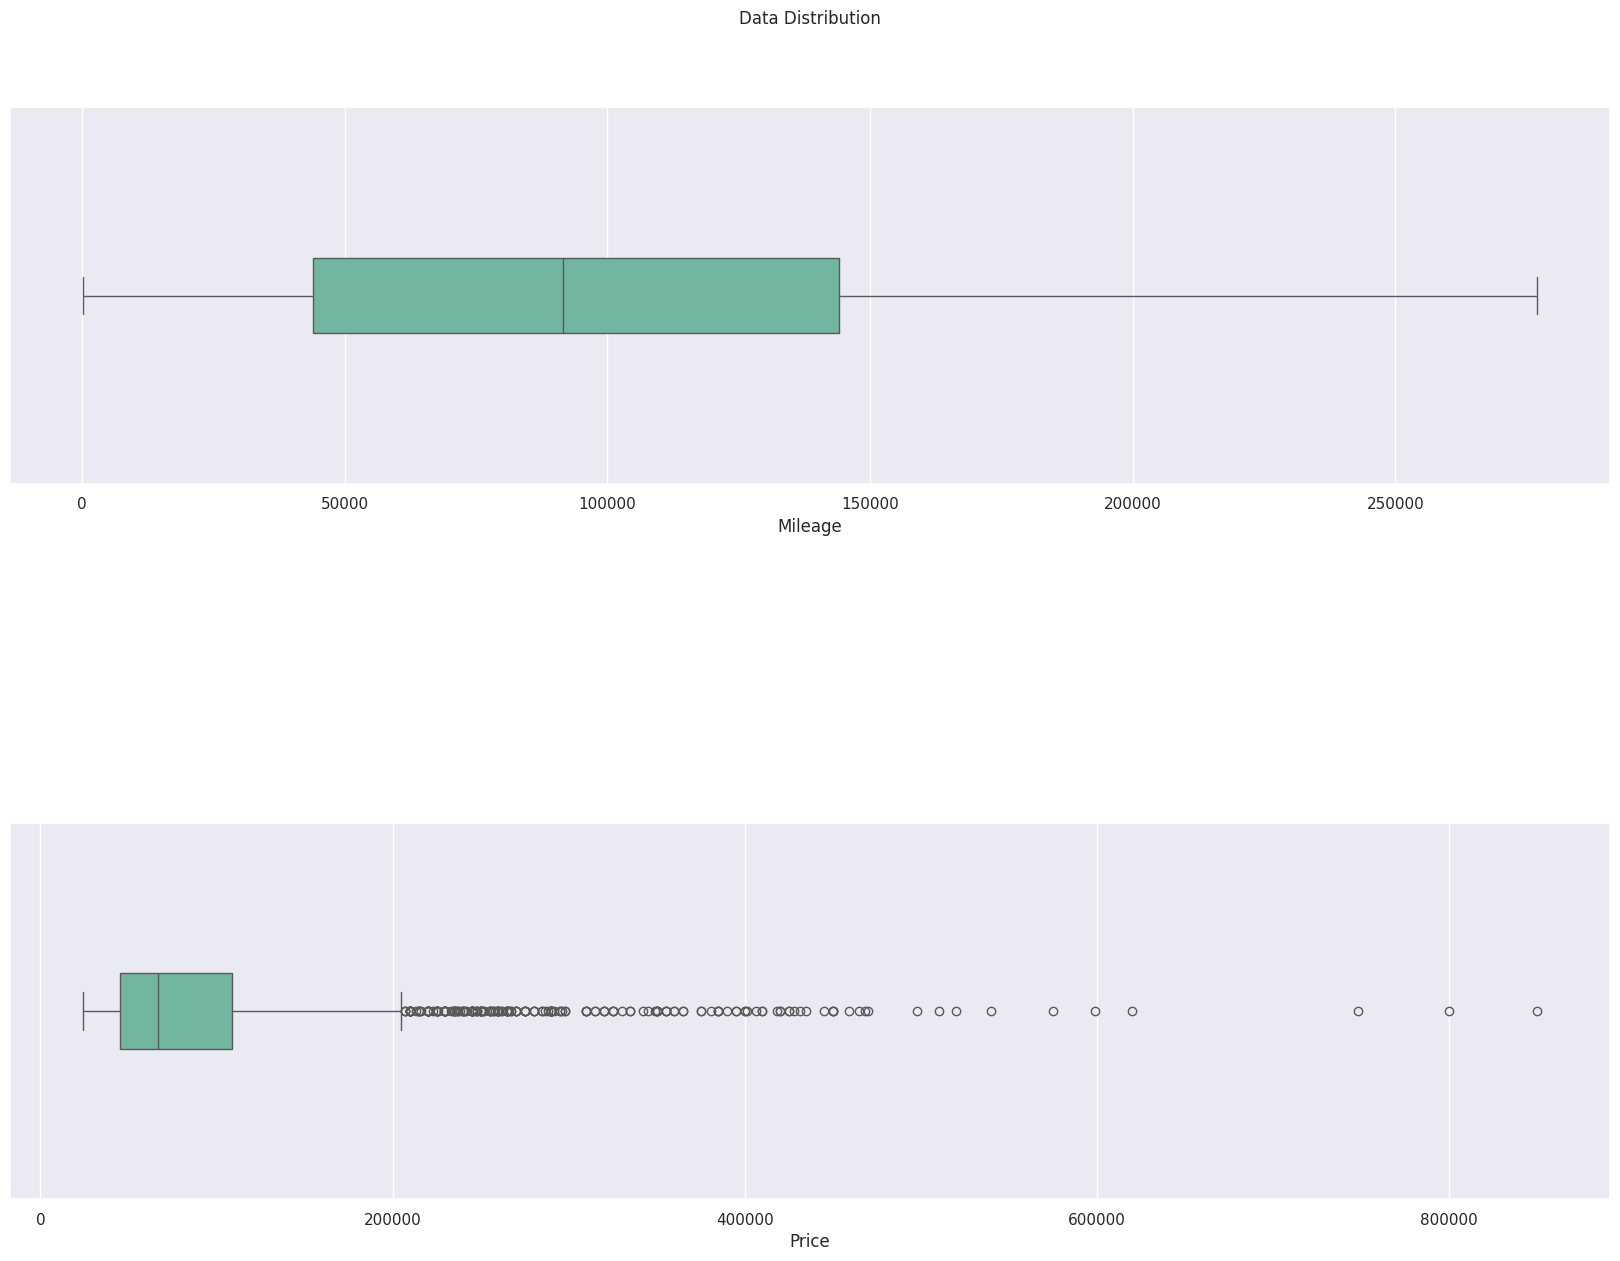

In [98]:
# outliers
fig, ax = plt.subplots(2,1, figsize=(20,14))

sns.boxplot(x='Mileage',data=filtered_df,width=0.2,ax=ax[0])
sns.boxplot(x='Price',data=filtered_df,width=0.2,ax=ax[1])

ax[0].set_title('Data Distribution', y=1.2)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, wspace=0.1, hspace=0.9)
plt.show()

Even though we already applying treshold to our data, we still got 208 outliers for Price data. We decide to not drop the outliers here because we want our model to be able to predict at our range of treshold data.

This outliers are above the upperbounds so it will affect our model to be tends to overpredict the price.

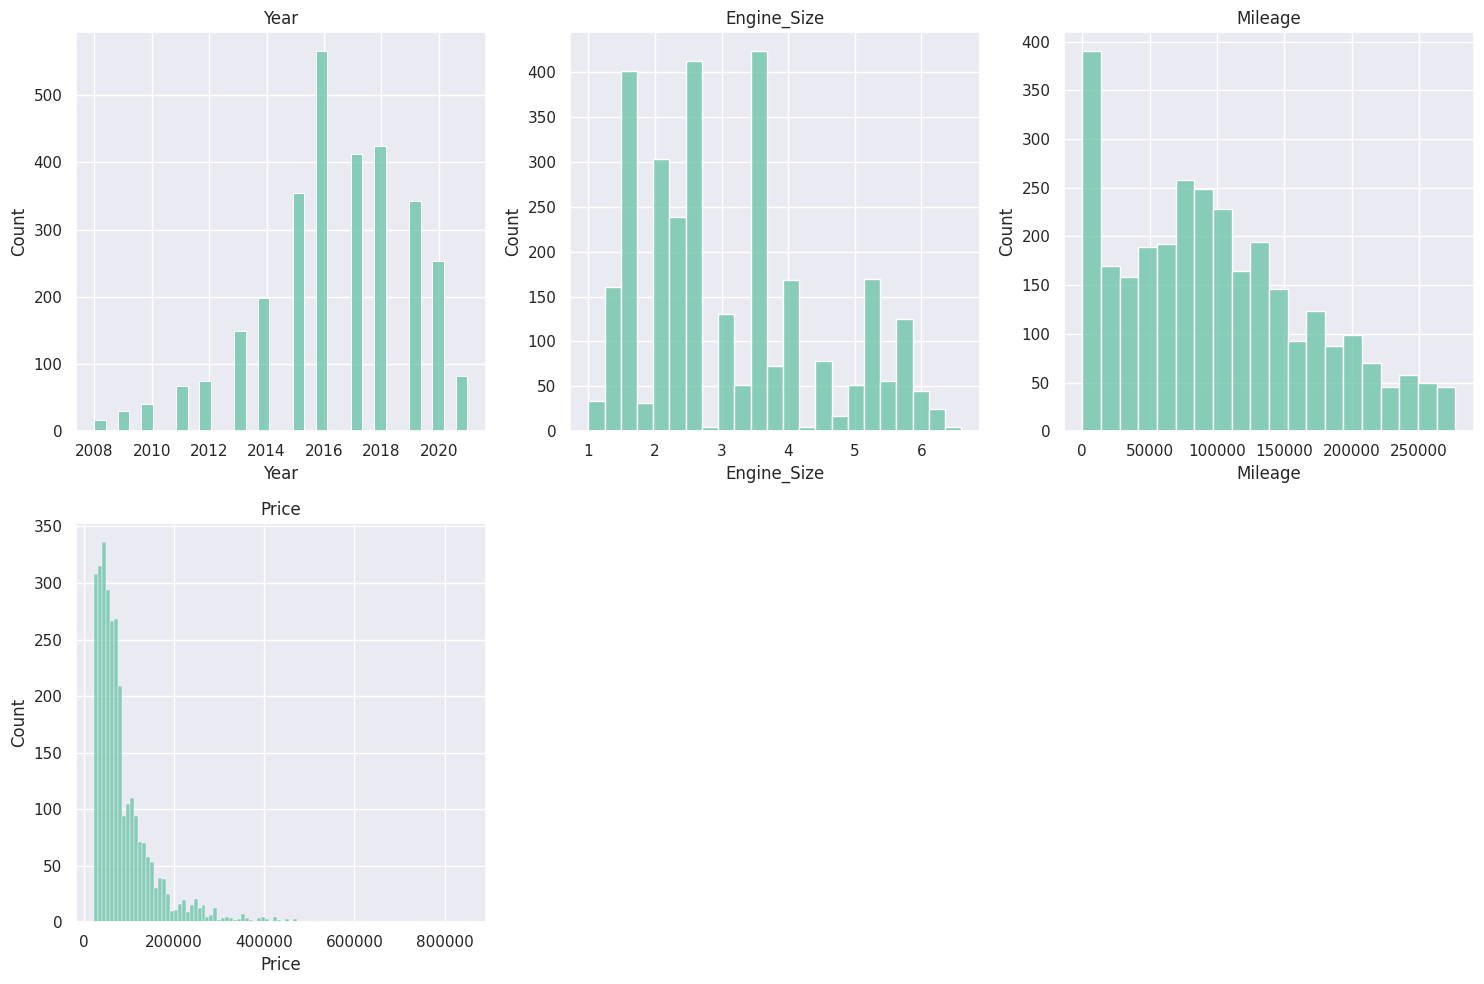

In [99]:
features = ['Year', 'Engine_Size', 'Mileage', 'Price']

plt.figure(figsize=(15,10))
sns.set(palette='Set2')
plotnumber = 1

for feature in features:
  ax = plt.subplot(2,3,plotnumber)
  sns.histplot(
      filtered_df[feature])
  plt.xlabel(feature)
  plt.title(feature)
  plotnumber += 1
  plt.tight_layout()

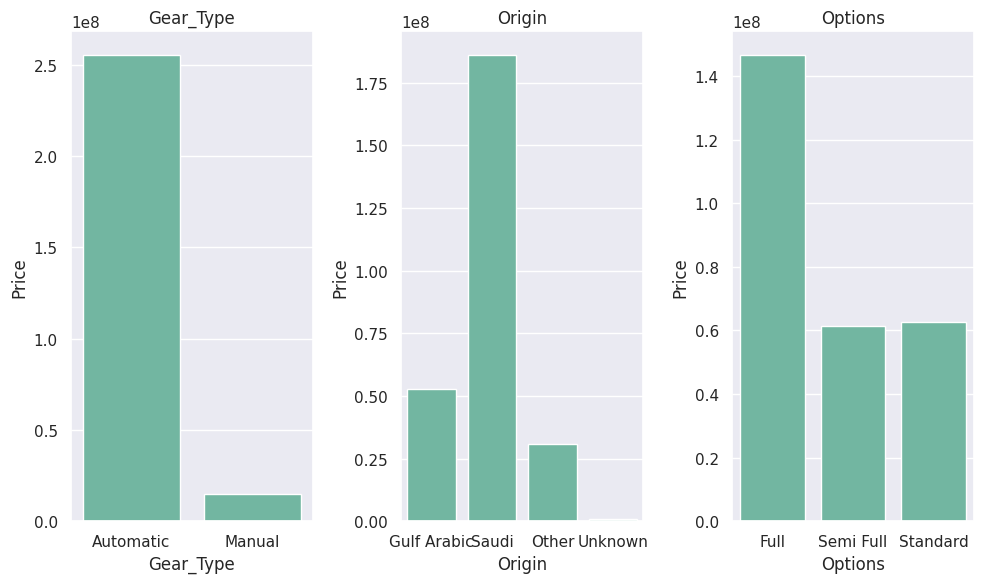

In [100]:
features = ['Gear_Type','Origin','Options']

plt.figure(figsize=(10,6))
sns.set(palette='Set2')
plotnumber = 1

for feature in features:
  ax = plt.subplot(1,3,plotnumber)
  sns.barplot(
      data=filtered_df,
      x=feature,
      y='Price',
      estimator=np.sum,
      errorbar=None)
  plt.xlabel(feature)
  plt.title(feature)
  plotnumber += 1
  plt.tight_layout()

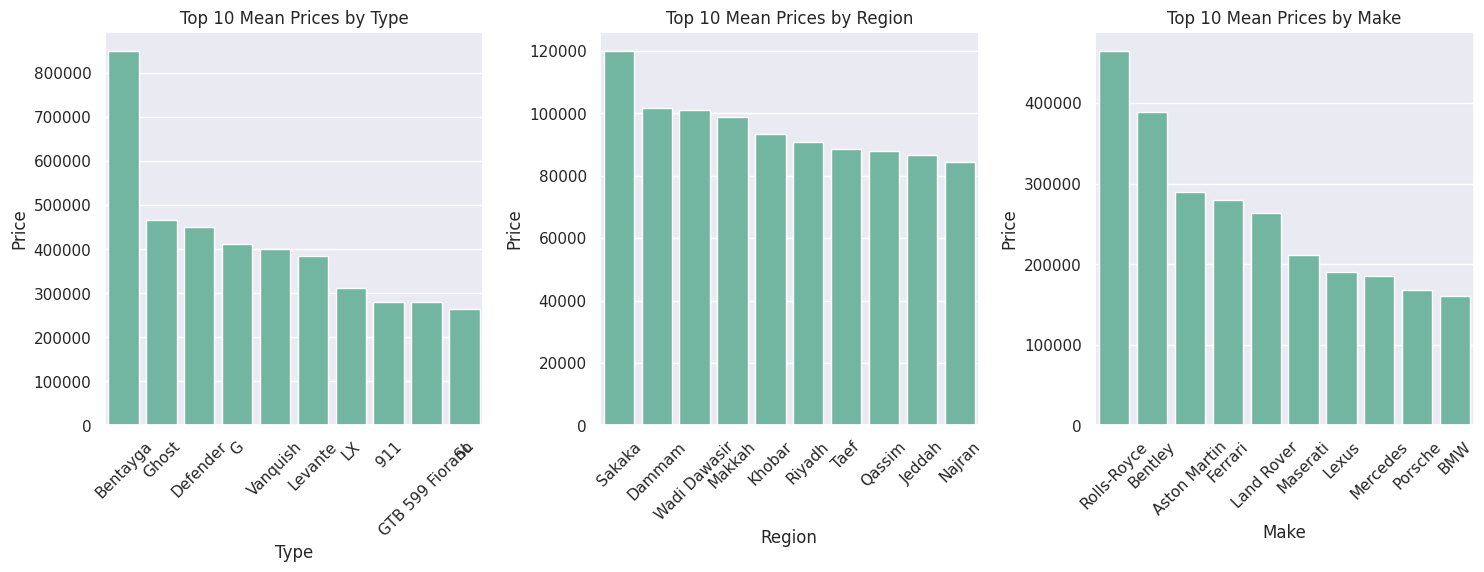

In [101]:
features = ['Type','Region','Make']

plt.figure(figsize=(15,10))
sns.set(palette='Set2')
plotnumber = 1

for feature in features:
    # Calculate mean price for each group
    mean_prices = filtered_df.groupby(feature)['Price'].mean().reset_index()
    # Sort by mean price and select top 10
    top_mean_prices = mean_prices.sort_values(by='Price', ascending=False).head(10)

    ax = plt.subplot(2, 3, plotnumber)
    sns.barplot(
        data=top_mean_prices,
        x=feature,
        y='Price',
        estimator=np.mean,
        errorbar=None
    )
    plt.xlabel(feature)
    plt.xticks(rotation=45)
    plt.title(f'Top 10 Mean Prices by {feature}')
    plotnumber += 1
    plt.tight_layout()

plt.show()

In [102]:
lexus = filtered_df[filtered_df['Make'] == 'Lexus']
lexus



,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
190,ES,Jeddah,Lexus,Automatic,Other,Full,2016,3.5,103000,False,102000
195,ES,Riyadh,Lexus,Automatic,Gulf Arabic,Semi Full,2018,3.5,28000,False,122000
196,ES,Makkah,Lexus,Automatic,Saudi,Semi Full,2013,2.5,239,False,65000
226,LS,Dammam,Lexus,Automatic,Saudi,Full,2015,4.6,132000,False,165000
259,ES,Dammam,Lexus,Automatic,Saudi,Full,2013,1.6,263000,False,66000
...,...,...,...,...,...,...,...,...,...,...,...
5234,GS,Dammam,Lexus,Automatic,Other,Semi Full,2016,2.5,58000,False,137000
5352,RX,Jeddah,Lexus,Automatic,Saudi,Full,2019,3.5,129000,False,178000
5487,IS,Jeddah,Lexus,Automatic,Saudi,Full,2018,3.5,54000,False,275000
5576,IS,Dammam,Lexus,Automatic,Other,Full,2015,2.2,94000,False,102000


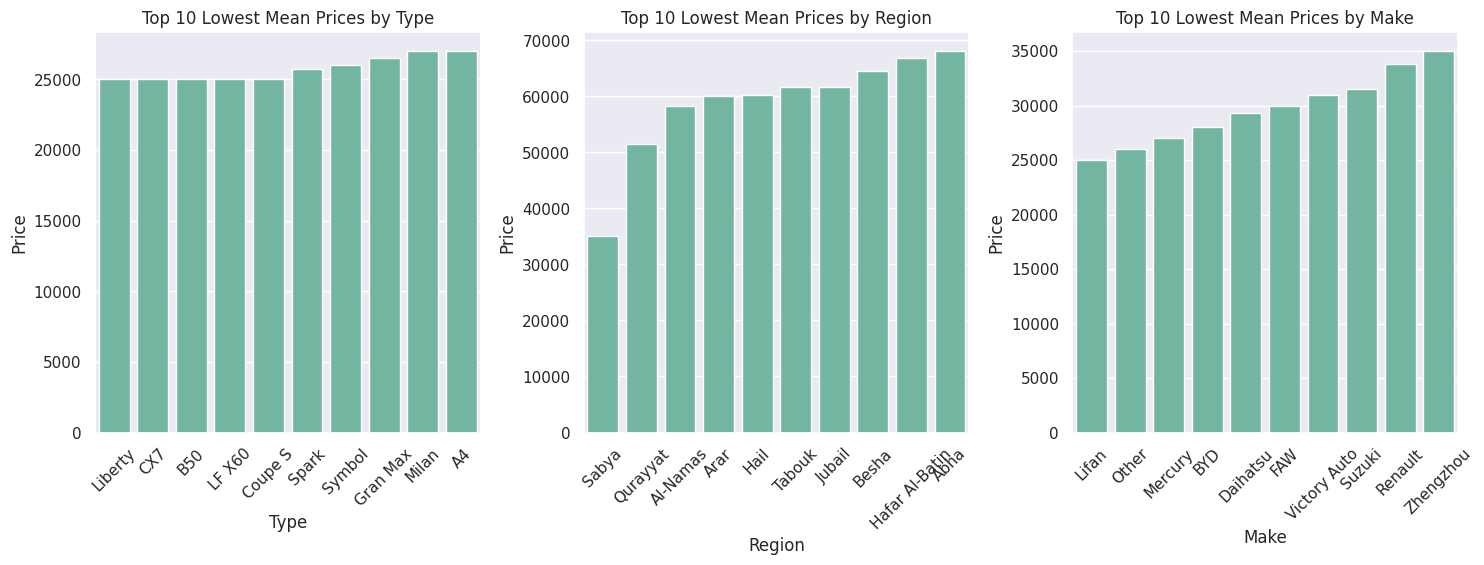

In [103]:
features = ['Type', 'Region', 'Make']

plt.figure(figsize=(15, 10))
sns.set(palette='Set2')
plotnumber = 1

for feature in features:
    # Calculate mean price for each group
    mean_prices = filtered_df.groupby(feature)['Price'].mean().reset_index()
    # Sort by mean price and select top 10 lowest
    lowest_mean_prices = mean_prices.sort_values(by='Price', ascending=True).head(10)

    ax = plt.subplot(2, 3, plotnumber)
    sns.barplot(
        data=lowest_mean_prices,
        x=feature,
        y='Price',
        estimator=np.mean,
        errorbar=None
    )
    plt.xlabel(feature)
    plt.title(f'Top 10 Lowest Mean Prices by {feature}')
    plt.xticks(rotation=45)  # Rotate x labels diagonally
    plotnumber += 1
    plt.tight_layout()

plt.show()

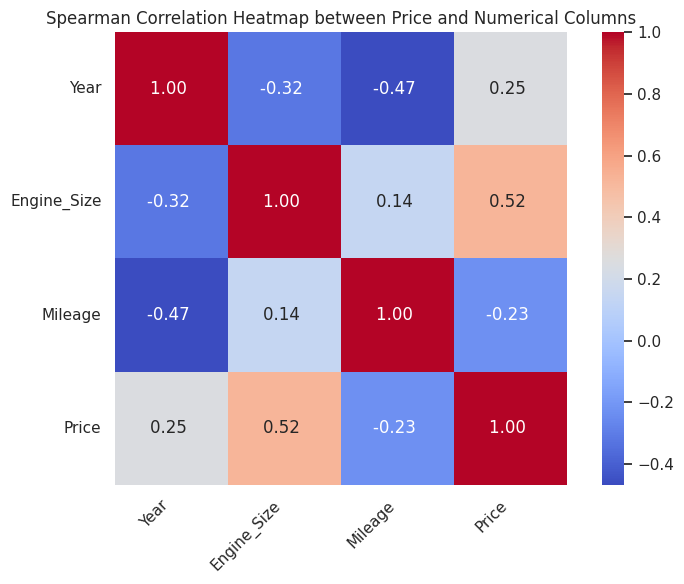

In [104]:
numerical_cols = filtered_df.describe().columns

# Assuming dfSAUC is your DataFrame and numerical_cols is a list of numerical column names
spearman_corr = filtered_df[numerical_cols].corr(method='spearman')

plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(spearman_corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Spearman Correlation Heatmap between Price and Numerical Columns')

# Adjust the annotations if needed
for t in heatmap.texts:
    t.set_text(t.get_text() + " ")

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

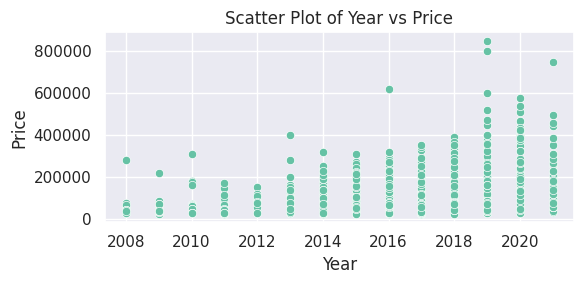

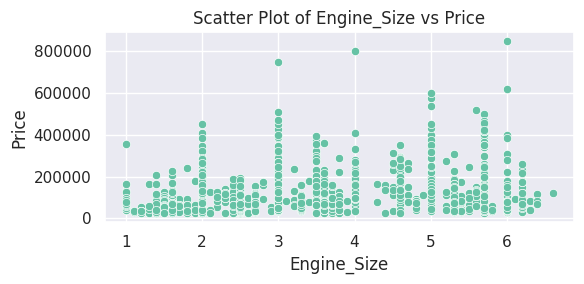

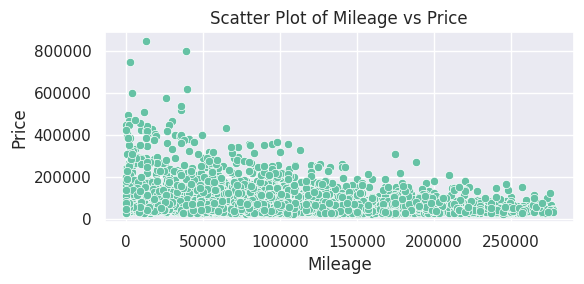

In [105]:
features = ['Year', 'Engine_Size', 'Mileage']



for feature in features:
  plt.figure(figsize=(6,3))
  sns.scatterplot(x=filtered_df[feature], y=filtered_df['Price'])
  plt.title(f'Scatter Plot of {feature} vs Price')
  plt.xlabel(feature)
  plt.ylabel('Price')
  plotnumber+=1
  plt.tight_layout()



#Data Preprocessing

## Feature Engineering

In [106]:
filtered_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,3009.0,2016.428382,2.585815,2008.0,2015.0,2017.0,2018.0,2021.0
Engine_Size,3009.0,3.088900,1.354392,1.0,2.0,2.7,3.8,6.6
Mileage,3009.0,99693.531073,70443.252713,100.0,44000.0,91440.0,144000.0,277000.0
Price,3009.0,90014.078764,74774.840136,24000.0,45000.0,67000.0,109000.0,850000.0


In [107]:
filtered_df.describe(include='object').T

,count,unique,top,freq
Type,3009,279,Accent,130
Region,3009,27,Riyadh,1326
Make,3009,54,Toyota,689
Gear_Type,3009,2,Automatic,2785
Origin,3009,4,Saudi,2274
Options,3009,3,Full,1190


### Create Country_make Feature

In [108]:
car_brands_to_country = {
    'Toyota': 'Japan',
    'Hyundai': 'South Korea',
    'Ford': 'USA',
    'Chevrolet': 'USA',
    'Nissan': 'Japan',
    'Kia': 'South Korea',
    'GMC': 'USA',
    'Mercedes': 'Germany',
    'Lexus': 'Japan',
    'Mazda': 'Japan',
    'Honda': 'Japan',
    'Mitsubishi': 'Japan',
    'Dodge': 'USA',
    'BMW': 'Germany',
    'Jeep': 'USA',
    'Chrysler': 'USA',
    'Genesis': 'South Korea',
    'Renault': 'France',
    'Changan': 'China',
    'Audi': 'Germany',
    'Cadillac': 'USA',
    'Land Rover': 'UK',
    'Geely': 'China',
    'Volkswagen': 'Germany',
    'MG': 'UK',
    'Porsche': 'Germany',
    'Isuzu': 'Japan',
    'INFINITI': 'Japan',
    'Suzuki': 'Japan',
    'HAVAL': 'China',
    'Lincoln': 'USA',
    'Jaguar': 'UK',
    'Peugeot': 'France',
    'MINI': 'UK',
    'Fiat': 'Italy',
    'Mercury': 'USA',
    'Daihatsu': 'Japan',
    'FAW': 'China',
    'GAC': 'China',
    'Foton': 'China',
    'Maserati': 'Italy',
    'Zhengzhou': 'China',
    'Hummer': 'USA',
    'Bentley': 'UK',
    'Lifan': 'China',
    'Chery': 'China',
    'Other': 'Various',
    'Classic': 'Various',
    'Aston Martin': 'UK',
    'Škoda': 'Czech Republic',
    'Victory Auto': 'China',
    'Iveco': 'Italy',
    'BYD': 'China',
    'Great Wall': 'China'
}

# Map cities to states
filtered_df['Country_make'] = filtered_df['Make'].map(car_brands_to_country)

### Create Machine_Condition Feature

In [109]:
# Get the maximum value of the manufacture year
max_manufacture_year = filtered_df['Year'].max()
max_manufacture_year

filtered_df['car_age'] = (max_manufacture_year+1) - filtered_df['Year']

filtered_df['mils_per_year']= filtered_df['Mileage']/ filtered_df['car_age']



In [110]:
filtered_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,3009.0,2016.428382,2.585815,2008.000000,2015.0,2017.0,2018.000000,2021.0
Engine_Size,3009.0,3.088900,1.354392,1.000000,2.0,2.7,3.800000,6.6
Mileage,3009.0,99693.531073,70443.252713,100.000000,44000.0,91440.0,144000.000000,277000.0
Price,3009.0,90014.078764,74774.840136,24000.000000,45000.0,67000.0,109000.000000,850000.0
car_age,3009.0,5.571618,2.585815,1.000000,4.0,5.0,7.000000,14.0
mils_per_year,3009.0,18244.333022,11076.316431,10.454545,10600.0,17750.0,25166.666667,71000.0


In [111]:
# Define bin edges
bins = [0, 10000, 20000, 40000, 100000]

# Define bin labels
labels = ['seldomly used', 'normally used', 'overly used', 'extremely used']

# Create the bins for machine condition feature
filtered_df['Condition'] = pd.cut(filtered_df['mils_per_year'], bins=bins, labels=labels, right=False)
filtered_df['Condition'] = filtered_df['Condition'].astype(str)



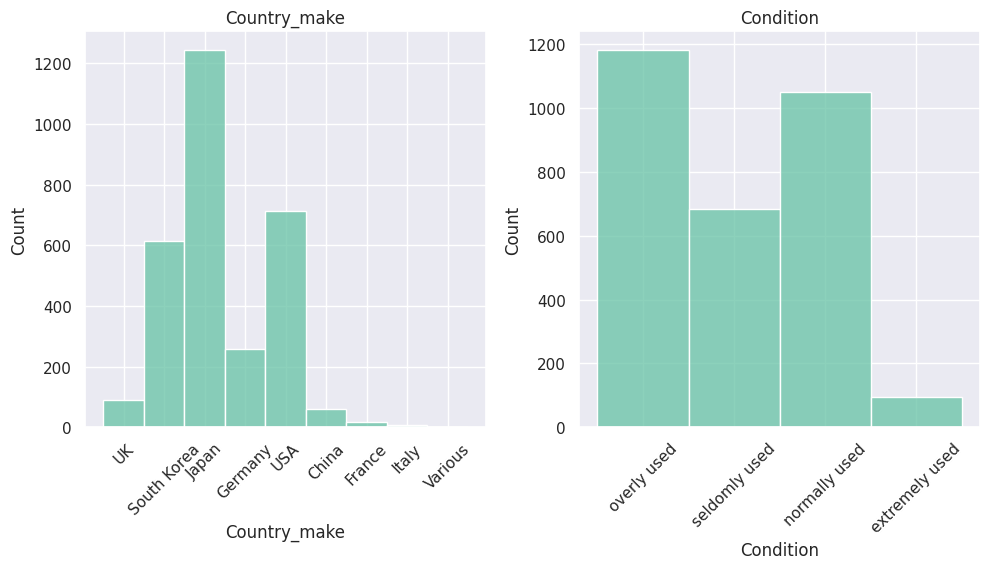

In [112]:
features = ['Country_make','Condition']

plt.figure(figsize=(15,10))
sns.set(palette='Set2')
plotnumber = 1

for feature in features:
  ax = plt.subplot(2,3,plotnumber)
  sns.histplot(
      filtered_df[feature])
  plt.xlabel(feature)
  plt.xticks(rotation=45)
  plt.title(feature)
  plotnumber += 1
  plt.tight_layout()

In [113]:
filtered_df.describe(include='object').T

,count,unique,top,freq
Type,3009,279,Accent,130
Region,3009,27,Riyadh,1326
Make,3009,54,Toyota,689
Gear_Type,3009,2,Automatic,2785
Origin,3009,4,Saudi,2274
Options,3009,3,Full,1190
Country_make,3006,9,Japan,1243
Condition,3009,4,overly used,1180


## Encoding and Scalling

In [114]:
one_hot = OneHotEncoder(handle_unknown='ignore')
one_hot_var = ['Options', 'Origin', 'Gear_Type']

binary_encoding = ce.BinaryEncoder()
binary_var = ['Type','Region','Country_make','Make']

In [115]:
categories = ['seldomly used', 'normally used', 'overly used', 'extremely used']

ordinal_encoder = OrdinalEncoder(categories=[categories])
ordinal_encode_var = ['Condition']

In [116]:
scaler = RobustScaler()
scaler_var = ['Mileage','Year','Engine_Size']

In [117]:
filtered_df.describe().columns

Index(['Year', 'Engine_Size', 'Mileage', 'Price', 'car_age', 'mils_per_year'], dtype='object')

In [118]:
filtered_df.describe(include='object')

,Type,Region,Make,Gear_Type,Origin,Options,Country_make,Condition
count,3009,3009,3009,3009,3009,3009,3006,3009
unique,279,27,54,2,4,3,9,4
top,Accent,Riyadh,Toyota,Automatic,Saudi,Full,Japan,overly used
freq,130,1326,689,2785,2274,1190,1243,1180


In [160]:
transformer = ColumnTransformer([
                                ('one hot', one_hot, one_hot_var),
                                ('binary', binary_encoding, binary_var),
                                ('ordinal',ordinal_encoder,ordinal_encode_var),
                                ('scaler',scaler,scaler_var)
                                ], remainder = 'passthrough')

### Log Tranformation for Target Variable

In [161]:
# Log transformation
filtered_df['log_price'] = np.log(filtered_df['Price'])

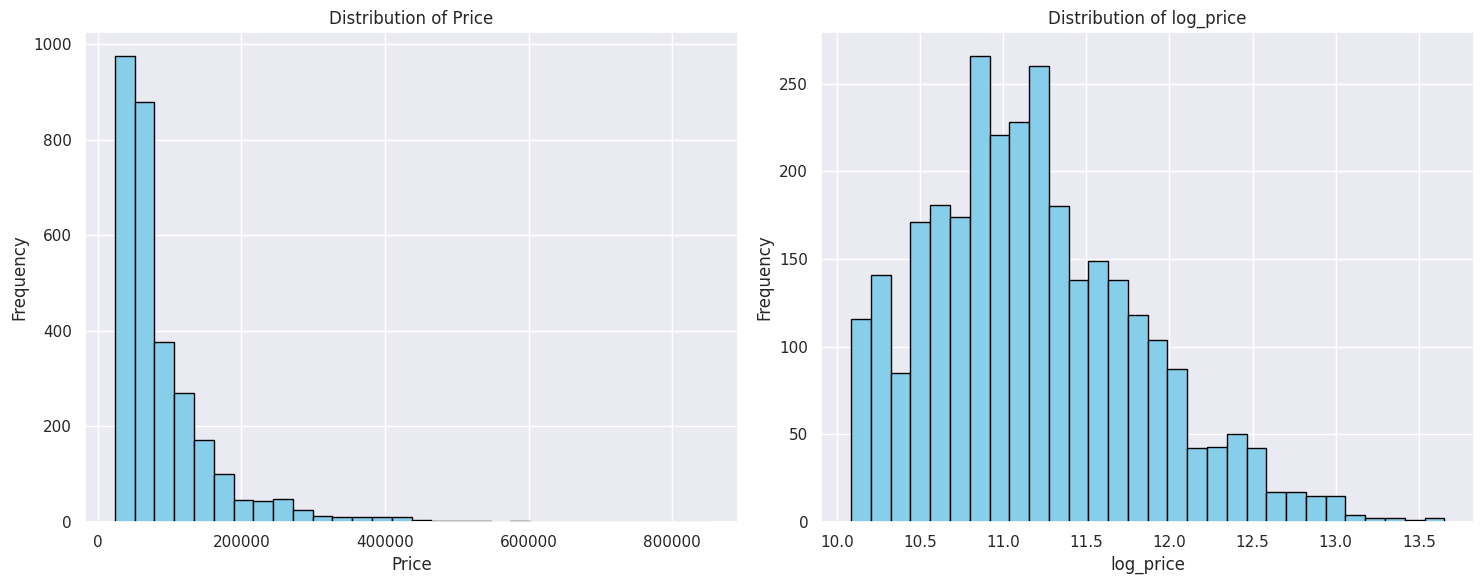

In [193]:
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plot histogram of Price
axs[0].hist(filtered_df['Price'], bins=30, edgecolor='black', color='skyblue')
axs[0].set_title('Distribution of Price')
axs[0].set_xlabel('Price')
axs[0].set_ylabel('Frequency')
axs[0].grid(True)

# Plot histogram of log_price
axs[1].hist(filtered_df['log_price'], bins=30, edgecolor='black', color='skyblue')
axs[1].set_title('Distribution of log_price')
axs[1].set_xlabel('log_price')
axs[1].set_ylabel('Frequency')
axs[1].grid(True)

# Show the plots
plt.tight_layout()
plt.show()

## DATA SPLITTING ( TRAIN AND TEST)

In [162]:
X = filtered_df.drop(columns=['Price','car_age','mils_per_year','log_price'])
y = filtered_df['log_price']

In [163]:
# Splitting data training dan test (70:30)
X_train, X_test, y_train, y_test= train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=2022)

In [164]:
Random_State = 2022
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=Random_State)
rf = RandomForestRegressor(random_state=Random_State)
xgb = XGBRegressor(random_state=Random_State)

models = [lr,knn,dt,rf,xgb]

## Training Model with Cross Validation

In [165]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict



def rmspe(y_true, y_pred):
    return np.sqrt(np.mean(((y_true - y_pred) / y_true) ** 2))

# Define custom scorers
scoring = {
    'rmse': make_scorer(mean_squared_error, squared=False),
    'rmspe': make_scorer(rmspe),
    'mape': make_scorer(mean_absolute_percentage_error),
    'r2':'r2'
}

# Lists to store results
rmse_mean = []
mae_mean = []
mape_mean = []
model_name = []
rsquare_mean=[]
adjusted_r2_mean=[]

def compute_adjusted_r2(r2, n, p):
    if n > p + 1:
        adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
    else:
        adjusted_r2 = np.nan
    return adjusted_r2

# Evaluation loop
for model in models:
    model_pipeline = Pipeline([
        ('preprocessing', transformer),
        ('modeling', model),
    ])

    # Perform cross-validation with cross_val_predict
    y_pred = cross_val_predict(model_pipeline, X_train, y_train, cv=5)

    # Inverse log transform
    y_true_inv = np.expm1(y_train)
    y_pred_inv = np.expm1(y_pred)

    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_true_inv, y_pred_inv))
    rmspe = np.sqrt(np.mean(((y_true_inv - y_pred_inv) / y_true_inv) ** 2))
    mae = mean_absolute_error(y_true_inv, y_pred_inv)
    mape = mean_absolute_percentage_error(y_true_inv, y_pred_inv)
    r2 = r2_score(y_true_inv, y_pred_inv)
    adjusted_r2 = compute_adjusted_r2(r2, len(y_true_inv), X_train.shape[1])

    # Append results
    rmse_mean.append(rmse)
    mae_mean.append(mae)
    mape_mean.append(mape)
    rsquare_mean.append(r2)
    adjusted_r2_mean.append(adjusted_r2)
    model_name.append(model.__class__.__name__)

# Create a DataFrame to display results
results_df = pd.DataFrame({
    'Model': model_name,
    'RMSE': rmse_mean,
    'MAE': mae_mean,
    'MAPE': mape_mean,
    'Adjusted R-squared':adjusted_r2_mean
})

print('Training Model with CrossVal Result')
results_df




Training Model with CrossVal Result


,Model,RMSE,MAE,MAPE,Adjusted R-squared
0,LinearRegression,43039.746575,24217.065173,0.272717,0.669331
1,KNeighborsRegressor,39626.210088,20375.252557,0.230339,0.719703
2,DecisionTreeRegressor,50876.535312,24956.934687,0.276980,0.537950
3,RandomForestRegressor,35312.616638,17399.950313,0.189642,0.777406
4,XGBRegressor,33161.180364,17106.039732,0.189923,0.803703


## Predict Test Data

In [166]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import cross_val_predict
from sklearn.pipeline import Pipeline


def rmspe(y_true, y_pred):
    return np.sqrt(np.mean(((y_true - y_pred) / y_true) ** 2))

# Define custom scorers
scoring = {
    'rmse': make_scorer(mean_squared_error, squared=False),
    'rmspe': make_scorer(rmspe),
    'mape': make_scorer(mean_absolute_percentage_error),
    'r2':'r2'
}

# Lists to store results
rmse_mean = []
mae_mean =[]
mape_mean = []
model_name = []
rsquare_mean =[]
adjusted_r2_mean =[]

def compute_adjusted_r2(r2, n, p):
    if n > p + 1:
        adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
    else:
        adjusted_r2 = np.nan
    return adjusted_r2

# Evaluation loop
for model in models:
    model_pipeline = Pipeline([
        ('preprocessing', transformer),
        ('modeling', model),
    ])

    # Fit the model on the training set
    model_pipeline.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model_pipeline.predict(X_test)

    # Inverse log transform
    y_true_inv = np.expm1(y_test)
    y_pred_inv = np.expm1(y_pred)

    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_true_inv, y_pred_inv))
    mae = mean_absolute_error(y_true_inv, y_pred_inv)
    rmspe = np.sqrt(np.mean(((y_true_inv - y_pred_inv) / y_true_inv) ** 2))
    mape = mean_absolute_percentage_error(y_true_inv, y_pred_inv)
    r2 = r2_score(y_true_inv, y_pred_inv)
    adjusted_r2 = compute_adjusted_r2(r2, len(y_true_inv), X_train.shape[1])

    # Append results
    rmse_mean.append(rmse)
    mae_mean.append(mae)
    mape_mean.append(mape)
    adjusted_r2_mean.append(adjusted_r2)
    model_name.append(model.__class__.__name__)

# Create a DataFrame to display results
results_df = pd.DataFrame({
    'Model': model_name,
    'RMSE': rmse_mean,
    'MAE': mae_mean,
    'MAPE': mape_mean,
    'Adjusted R-squared': adjusted_r2_mean
})
print('Predict on Test Data Result')
results_df



Predict on Test Data Result


,Model,RMSE,MAE,MAPE,Adjusted R-squared
0,LinearRegression,41045.245856,22972.996054,0.270867,0.688424
1,KNeighborsRegressor,35529.925044,18267.696262,0.227015,0.766532
2,DecisionTreeRegressor,41601.560927,19961.795127,0.228727,0.679921
3,RandomForestRegressor,30078.861133,14931.903874,0.172260,0.832675
4,XGBRegressor,31150.017794,15279.285520,0.171527,0.820545


Interpretation of Metrics:

RMSE (Root Mean Squared Error):

This metric measures the average magnitude of the errors between predicted and actual values. Lower RMSE indicates better model performance.
XGBRegressor has the lowest RMSE (31385.88), suggesting it makes the smallest average error in predictions compared to the other models.


MAE (Mean Absolute Error):

This metric measures the average absolute errors between predicted and actual values. Like RMSE, a lower MAE indicates better model performance.
XGBRegressor also has the lowest MAE (16811.42), reinforcing its ability to make accurate predictions.


MAPE (Mean Absolute Percentage Error):

MAPE measures the accuracy of predictions as a percentage. Lower MAPE values indicate more accurate models.
XGBRegressor has a low MAPE (0.2041), indicating it has the least percentage error among the models.

R2 (R-squared):

R2 measures the proportion of the variance in the dependent variable that is predictable from the independent variables. Higher R2 values indicate better fit.
XGBRegressor has the highest R2 value (0.8202), indicating it explains the most variance in the target variable compared to the other models.

Model Comparison:

LinearRegression: Has a relatively high RMSE and MAE, and a lower R2 value. This suggests it is less accurate and explains less variance in the data.

KNeighborsRegressor: Performs better than LinearRegression and DecisionTreeRegressor in terms of RMSE and MAE but still has higher errors compared to XGBRegressor.

DecisionTreeRegressor: Shows poor performance with higher RMSE, MAE, and a low R2 value, indicating overfitting or lack of generalization.

RandomForestRegressor: Performs better than DecisionTreeRegressor and other models but is slightly outperformed by XGBRegressor.

Reasons to Choose XGBRegressor:
Lowest RMSE: Indicates the smallest average prediction error.
Lowest MAE: Shows the smallest average absolute error in predictions.
Low MAPE: Demonstrates the least percentage error in predictions.
Highest R2: Indicates the best fit to the data and explains the highest variance.

Conclusion:
Based on the metrics, XGBRegressor has demonstrated superior performance across all evaluation metrics. Its ability to minimize errors (RMSE, MAE, MAPE) and maximize the explained variance (R2) makes it the most robust and reliable model for predicting car prices in this context. This combination of accuracy and robustness in handling variance and overfitting is why XGBRegressor is chosen as the best model among the options evaluated.

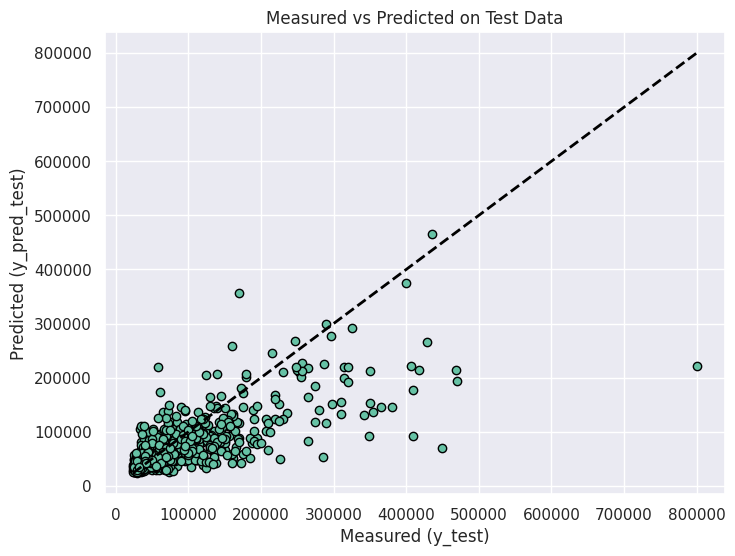

In [167]:
# Predictions on training data
X_test_encoded = transformer.fit_transform(X_test)
y_pred_test = model.predict(X_test_encoded)
y_pred_test_origin = np.expm1(y_pred_test)
y_test_origin = np.expm1(y_test)

# Plot y_train vs y_pred_train
plt.figure(figsize=(8, 6))
plt.scatter(y_test_origin, y_pred_test_origin, edgecolors=(0, 0, 0))
plt.plot([y_test_origin.min(), y_test_origin.max()], [y_test_origin.min(), y_test_origin.max()], 'k--', lw=2)
plt.xlabel('Measured (y_test)')
plt.ylabel('Predicted (y_pred_test)')
plt.title('Measured vs Predicted on Test Data')
plt.show()

# Hyperparameter Tuning

Based on Test data, we can see that

In [168]:
# Define the XGBRegressor model and parameter grid
xgb_model = xgb
param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__max_depth': [3, 5, 7],
    'model__subsample': [0.7, 0.8, 0.9],
    'model__colsample_bytree': [0.7, 0.8, 0.9]
}


# Create the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', transformer),
    ('model', xgb_model)
])

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid,
                             scoring='neg_mean_absolute_percentage_error',
                             cv=3, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Save the best parameters and model
best_params = grid_search.best_params_
best_model_xgb = grid_search.best_estimator_

# Print best parameters
print("Best parameters for XGBRegressor:", best_params)

# Evaluate the model
y_pred = best_model_xgb.predict(X_test)


Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best parameters for XGBRegressor: {'model__colsample_bytree': 0.7, 'model__learning_rate': 0.1, 'model__max_depth': 5, 'model__n_estimators': 300, 'model__subsample': 0.8}


In [169]:
best_model_xgb

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one hot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Options', 'Origin',
                                                   'Gear_Type']),
                                                 ('binary', BinaryEncoder(),
                                                  ['Type', 'Region',
                                                   'Country_make', 'Make']),
                                                 ('ordinal',
                                                  OrdinalEncoder(categories=[['seldomly '
                                                                              'used',
                                                                              'normally '
                                                                              'used',
                                                                              'overly '
                                                                              'used',
                                                                              'extremely '
                                                                              'used']]),
                                                  ['C...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=5, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=300, n_jobs=None,
                              num_parallel_tree=None, random_state=2022, ...))])

In [170]:
# Evaluate the model
y_pred = best_model_xgb.predict(X_test)
y_pred_original = np.expm1(y_pred)
y_test_tune_origin = np.expm1(y_test)

# Calculate the number of samples and number of predictors
n = X_test.shape[0]
k = X_test.shape[1]

r2=r2_score(y_test_tune_origin, y_pred_original)
# Calculate the adjusted R-squared value
adjusted_r2 = 1 - ((1 - r2) * (n - 1)) / (n - k - 1)


print(f"RMSE on test set: {np.sqrt(mean_squared_error(y_test_tune_origin, y_pred_original))}")
print(f"MAE on test set: {(mean_absolute_error(y_test_tune_origin, y_pred_original))}")
print("MAPE on test set for XGBRegressor:", mean_absolute_percentage_error(y_test_tune_origin, y_pred_original))
print("R-Square on test set for XGBRegressor:", r2_score(y_test_tune_origin, y_pred_original))
print("Adjusted R-Square on test set for XGBRegressor:", adjusted_r2)




RMSE on test set: 28496.559741815316
MAE on test set: 14185.527242092336
MAPE on test set for XGBRegressor: 0.1578453734800744
R-Square on test set for XGBRegressor: 0.8518142100636413
Adjusted R-Square on test set for XGBRegressor: 0.8498161994128139


### Hyperparameter Tuning for Random Forest

In [171]:
# Define the RandomForestRegressor model and parameter grid
rf_model = rf
param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__bootstrap': [True, False]
}

# Create the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', transformer),
    ('model', rf_model)
])

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid,
                             scoring='neg_mean_absolute_percentage_error',
                             cv=3, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Save the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print best parameters
print("Best parameters for RandomForestRegressor:", best_params)

# Evaluate the model
y_pred = best_model.predict(X_test)


Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best parameters for RandomForestRegressor: {'model__bootstrap': True, 'model__max_depth': 20, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 100}


In [172]:
y_pred_original = np.expm1(y_pred)
y_test_tune_origin = np.expm1(y_test)
# Calculate the number of samples and number of predictors
n = X_test.shape[0]
k = X_test.shape[1]

# Calculate the adjusted R-squared value
r2 =r2_score(y_test_tune_origin, y_pred_original)
adjusted_r2 = 1 - ((1 - r2) * (n - 1)) / (n - k - 1)

print(f"RMSE on test set: {np.sqrt(mean_squared_error(y_test_tune_origin, y_pred_original))}")
print(f"MAE on test set: {(mean_absolute_error(y_test_tune_origin, y_pred_original))}")
print("MAPE on test set for Random Forest:", mean_absolute_percentage_error(y_test_tune_origin, y_pred_original))
print("R-Square on test set for Random Forest:", r2_score(y_test_tune_origin, y_pred_original))
print("Adjusted R-Square on test set for Random Forest:", adjusted_r2)

RMSE on test set: 30245.44203236715
MAE on test set: 15004.522949332766
MAPE on test set for Random Forest: 0.1729671097484702
R-Square on test set for Random Forest: 0.8330672430125086
Adjusted R-Square on test set for Random Forest: 0.8308164642666098


Percentage of Over Predictions: 52.159468438538205
Percentage of Under Predictions: 47.840531561461795


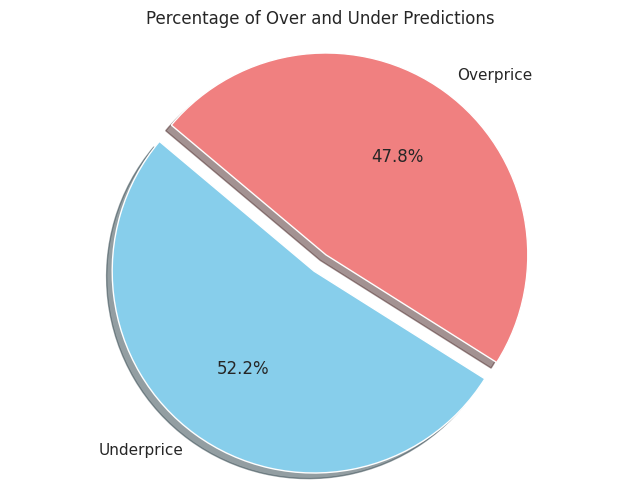

In [173]:
y_pred = best_model_xgb.predict(X_test)
y_pred_original = np.expm1(y_pred)
y_test_tune_origin = np.expm1(y_test)

def over_under_percentage(y_true, y_pred):
    over = np.sum(y_pred > y_true) / len(y_true) * 100
    under = np.sum(y_pred < y_true) / len(y_true) * 100
    return over, under



# Calculate over/under percentages
over_percentage, under_percentage = over_under_percentage(y_test_tune_origin, y_pred_original)
print("Percentage of Over Predictions:", over_percentage)
print("Percentage of Under Predictions:", under_percentage)
# Pie chart
labels = ['Underprice', 'Overprice']
sizes = [over_percentage, under_percentage]
colors = ['skyblue', 'lightcoral']
explode = (0.1, 0)  # explode the 1st slice (Over Predictions)

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.title('Percentage of Over and Under Predictions')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## Feature Importance

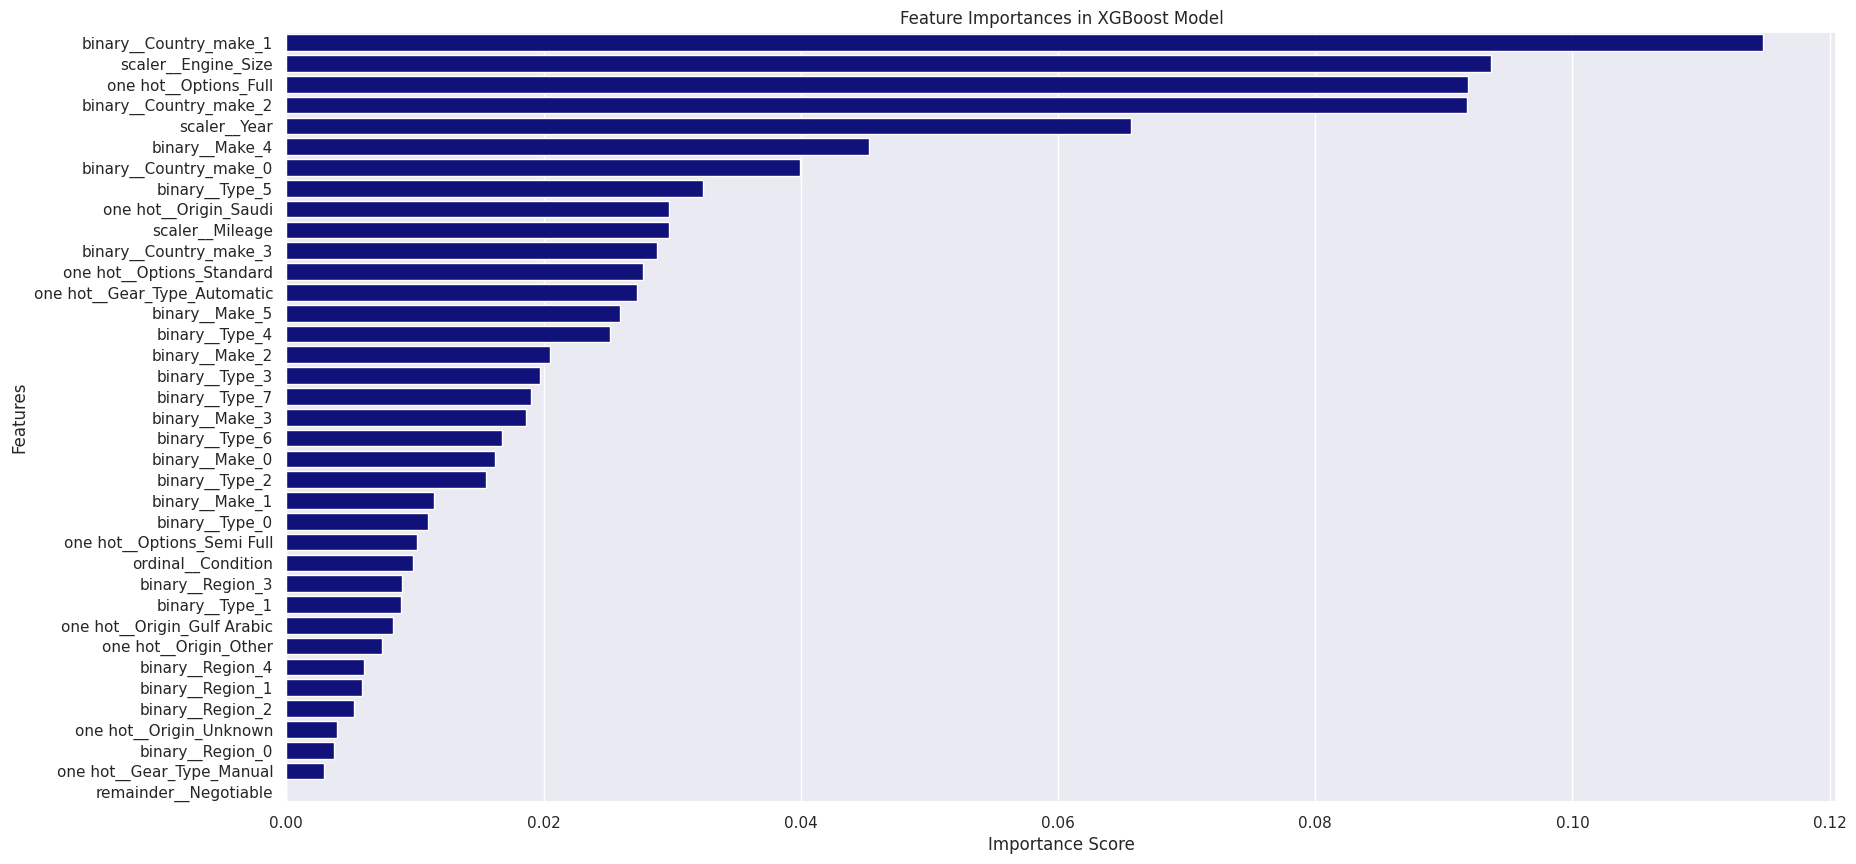

In [174]:
# Retrieve the XGBoost model from the pipeline
xgb_model = best_model_xgb.named_steps['model']

# Access feature names after transformation
encoded_features = transformer.get_feature_names_out(input_features=X_train.columns)

# Get feature importances
feature_imp = pd.DataFrame({"Features": encoded_features, "Nilai": xgb_model.feature_importances_})
feature_imp = feature_imp.sort_values(by="Nilai", ascending=False)

# Plot feature importances
plt.figure(figsize=(20, 10))
sns.barplot(data=feature_imp, x="Nilai", y="Features", color='darkblue')
plt.title('Feature Importances in XGBoost Model')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

In [175]:
transformer._transformers

[('one hot', OneHotEncoder(handle_unknown='ignore')),
 ('binary', BinaryEncoder()),
 ('ordinal',
  OrdinalEncoder(categories=[['seldomly used', 'normally used', 'overly used',
                              'extremely used']])),
 ('scaler', RobustScaler())]

## Explainable AI

In [176]:
!pip install shap

 98%|===================| 887/903 [00:27<00:00]       

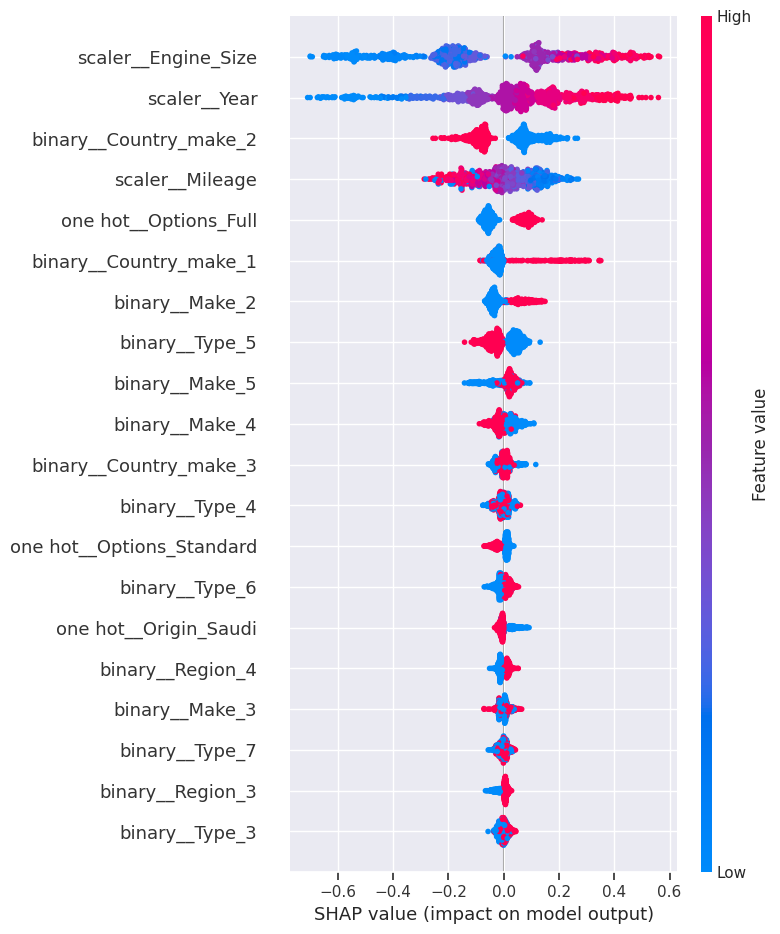

In [177]:
import shap
import matplotlib.pyplot as plt

# Assuming best_model, X_train, X_test, and transformer are already defined

# Transform the training and test data using the preprocessor
X_train_transformed = best_model_xgb.named_steps['preprocessor'].transform(X_train)
X_test_transformed = best_model_xgb.named_steps['preprocessor'].transform(X_test)

# Access feature names after transformation
encoded_features = best_model.named_steps['preprocessor'].get_feature_names_out(input_features=X_train.columns)

# Create a SHAP explainer for the XGBoost model
explainer = shap.Explainer(best_model_xgb.named_steps['model'], X_train_transformed)

# Compute SHAP values for the test set
shap_values = explainer(X_test_transformed)

# Plot the SHAP summary plot
shap.summary_plot(shap_values, features=X_test_transformed, feature_names=encoded_features)

# Plot a single SHAP force plot for the first test sample
shap.initjs()



In [178]:
# import pickle

# final_model = best_model_xgb
# final_model.fit(X_train,y_train)

# pickle.dump(final_model, open('/content/model_reg_Arab_Saudi_Usedcars.pkl','wb'))

## MACHINE LEARNING DEMO

In [180]:
print("Data types of each input column in X_train:")
print(X_train.dtypes)

Data types of each input column in X_train:
Type            object 
Region          object 
Make            object 
Gear_Type       object 
Origin          object 
Options         object 
Year            int64  
Engine_Size     float64
Mileage         int64  
Negotiable      bool   
Country_make    object 
Condition       object 
dtype: object


In [181]:
# new_data_transformed = best_model.named_steps['preprocessor'].transform(new_data_df)


In [182]:
# new_prediction = best_model.named_steps['model'].predict(new_data_transformed)

# print(f"Predicted price for the new data point: {new_prediction[0]}")


In [183]:


# Assuming best_model, X_test, and y_test are already defined

# Step 1: Select random samples from X_test
np.random.seed(42)  # Set a random seed for reproducibility
random_indices = np.random.choice(X_test.index, size=5, replace=False)
random_samples = X_test.loc[random_indices]
actual_values = y_test.loc[random_indices]

# Step 2: Transform the random samples using the preprocessor
random_samples_transformed = best_model.named_steps['preprocessor'].transform(random_samples)

# Step 3: Predict using the best model
predictions = best_model.named_steps['model'].predict(random_samples_transformed)


# Step 4: Compare predicted values with actual values
comparison_df = pd.DataFrame({
    'Actual': actual_values,
    'Predicted': predictions
}, index=random_indices)

# Step 5: Invert log-transformed values
comparison_df['Actual'] = np.exp(comparison_df['Actual'])
comparison_df['Predicted'] = np.exp(comparison_df['Predicted'])

print("Comparison of actual vs. predicted values (original scale):")
print(comparison_df)


Comparison of actual vs. predicted values (original scale):
       Actual     Predicted
4595  65000.0  56776.536248
2239  26500.0  40431.290572
4689  39000.0  39407.934448
3576  37000.0  56286.390454
4038  76500.0  82413.878459


In [184]:
# import numpy as np
# import pandas as pd

# import numpy as np
# import pandas as pd

# def rmspe(y_true, y_pred):
#     return np.sqrt(np.mean(((y_true - y_pred) / y_true) ** 2))

# # Assuming best_model, X_test, and y_test are already defined

# # Step 1: Select random samples from X_test based on price ranges
# price_bins = [0, 100000, 200000, 400000, np.inf]
# labels = ['<100000', '100000-200000', '200000-400000', '>400000']

# # Assuming 'price' is the column name for the price data
# X_test['price'] = filtered_df['Price']  # Replace with your price data

# # Create price bins
# X_test['price_bin'] = pd.cut(X_test['price'], bins=price_bins, labels=labels)

# # Group data by price bin
# grouped_data = X_test.groupby('price_bin')

# # Select 5 random samples from each group
# random_samples = []
# for name, group in grouped_data:
#     random_index = np.random.choice(group.index, size=5, replace=False)
#     random_samples.append(group.loc[random_index])

# # Concatenate the samples into a single DataFrame
# random_samples = pd.concat(random_samples)

# # Get corresponding actual values
# actual_values = y_test.loc[random_samples.index]

# # Step 2: Transform the random samples using the preprocessor
# random_samples_transformed = best_model.named_steps['preprocessor'].transform(random_samples)

# # Step 3: Predict using the best model
# predictions = best_model.named_steps['model'].predict(random_samples_transformed)

# # Step 4: Compare predicted values with actual values
# comparison_df = pd.DataFrame({
#     'Actual': actual_values,
#     'Predicted': predictions
# })

# # Step 5: Invert log-transformed values
# comparison_df['Actual'] = np.exp(comparison_df['Actual'])
# comparison_df['Predicted'] = np.exp(comparison_df['Predicted'])

# print("Comparison of actual vs. predicted values (original scale):")
# print(comparison_df)



In [185]:
model_param = grid_search.best_estimator_[-1]
model_param

RandomForestRegressor(max_depth=20, random_state=2022)

In [186]:
from sklearn.compose import TransformedTargetRegressor
import xgboost as xgb
# Assuming you have defined 'transformer' elsewhere


new_data_point = {
    'Type': 'Sedan',
    'Region': 'North America',
    'Make': 'Toyota',
    'Gear_Type': 'Automatic',
    'Origin': 'Japan',
    'Options': 'Basic',
    'Year': 2022,
    'Engine_Size': 2.0,
    'Mileage': 15000,
    'Negotiable': True,
    'Country_make': 'Japan',
    'Condition': 'normally used'
}

new_data_df = pd.DataFrame([new_data_point])
final_model = grid_search.best_estimator_
new_data_transformed = final_model.named_steps['preprocessor'].transform(new_data_df)

prediction = final_model.named_steps['model'].predict(new_data_transformed)
transformed_pred = np.expm1(prediction)


print(f"Predicted price for the new data point:",transformed_pred[0])


Predicted price for the new data point: 124484.87066655433


# Single prediction for extreme values

In [187]:

expensive_car = {
    'Type': 'Bentayga',
    'Region': 'Sakaka',
    'Make': 'Bentley',
    'Gear_Type': 'Automatic',
    'Origin': 'Saudi',
    'Options': 'Full',
    'Year': 2016,
    'Engine_Size': 3.6,
    'Mileage': 10000,
    'Negotiable': True,
    'Country_make': 'UK',
    'Condition': 'seldomly used'
}

new_data_df = pd.DataFrame([expensive_car])
final_model = best_model_xgb
new_data_transformed = final_model.named_steps['preprocessor'].transform(new_data_df)

prediction = final_model.named_steps['model'].predict(new_data_transformed)
transformed_pred = np.expm1(prediction)


print(f"Predicted price for the new data point:",transformed_pred[0])

Predicted price for the new data point: 205550.88


In [188]:

cheap_car = {
    'Type': 'Grand Max',
    'Region': 'Sabya',
    'Make': 'Daihatsu',
    'Gear_Type': 'Manual',
    'Origin': 'Other',
    'Options': 'Semi Full',
    'Year': 2008,
    'Engine_Size': 4.4,
    'Mileage': 225000,
    'Negotiable': True,
    'Country_make': 'Japan',
    'Condition': 'normally used'
}

new_data_df2 = pd.DataFrame([cheap_car])
final_model = best_model_xgb
new_data_transformed2 = final_model.named_steps['preprocessor'].transform(new_data_df2)

prediction_2 = final_model.named_steps['model'].predict(new_data_transformed2)
transformed_pred = np.expm1(prediction_2)


print(f"Predicted price for the new data point for cheap car:",transformed_pred[0])

Predicted price for the new data point for cheap car: 43490.082


In [189]:
# import pickle


# final_model.fit(X_train,y_train)

# pickle.dump(final_model, open('/content/model_reg_Arab_Saudi_Usedcars.pkl','wb'))

In [190]:
# !pip freeze > requirements.txt

In [191]:
# X_test.to_csv('batch_test.csv',index=False)


In [192]:
# X_test.head()